<a href="https://colab.research.google.com/github/Ritika-2706/nn-classification/blob/main/NNTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:

Register Number:

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
# dataset1 = pd.read_csv('/content/DL01 - Sheet1.csv')

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('DL01').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})

In [ ]:
dataset1.head()

,INPUT,OUTPUT
0,1.0,22.0
1,2.0,24.0
2,3.0,26.0
3,4.0,28.0
4,5.0,30.0


In [ ]:
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

Name:

Register Number:

In [ ]:
#Create the model
ai_brain = Sequential([
    Dense(5,activation = 'relu',input_shape=[1]),
    Dense(2,activation = 'relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:
# fit the model
ai_brain.fit(X_train1,y_train,epochs = 2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 838.4727
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 837.3865
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 836.9554
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 836.5869
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 836.2747
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 835.9612
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 835.6614
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 835.3789
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 835.1208
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 834.8491
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 834.5837
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 834.3233
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 834.0911
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 833.8372
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46

In [22]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

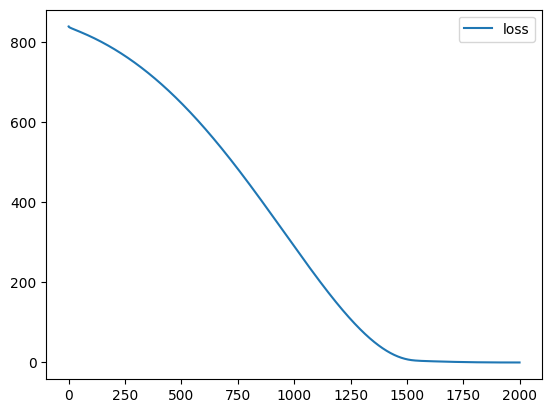

In [23]:
loss_df.plot()

In [24]:
X_test1 = Scaler.transform(X_test)

In [25]:
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 2.8154e-04


0.00028153767925687134

In [26]:
X_n1 = [[30]]

In [27]:
X_n1_1 = Scaler.transform(X_n1)

In [28]:
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[79.97021]], dtype=float32)